In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.feature_extraction.text import TfidfVectorizer
from src.text_factorization import lemmatize_tokens
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score
from src.plot_silhouette import knife_graph
from src.model_analysis import *
%matplotlib inline

In [2]:
df = pd.read_pickle('data/comedy_transcripts.pkl')

In [3]:
df

,special,full,lem_tokens
0,billy-connolly-high-horse-tour-live-transcript,"Ladies and gentlemen, would you please welcome...","[billy, im, not, well, man, well, word, later,..."
1,hannah-gadsby-douglas-transcript,The following is the transcript of Hannah Gadb...,"[explores, autism, affect, thinking, take, lit..."
2,patton-oswalt-i-love-everything-transcript,This is the full transcript of Patton Oswalt: ...,"[patton, oswalt, seen, extreme, high, low, las..."
3,russell-peters-deported-transcript,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,"[bring, brother, gave, somebody, going, hurt, ..."
4,jimmy-o-yang-good-deal-transcript,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes..."
...,...,...,...
321,jim-jefferies-gun-control-full-transcript,Australian comedian Jim Jefferies breaks down ...,"[netflix, special, bare, jim, jefferies, im, g..."
322,reggie-watts-spatial-transcript,"Hello, Im Thomas. Im so glad to meet you Mum ?...","[girl, today, shes, beautiful, wanted, kiss, w..."
323,george-carlin-complaints-grievances,Complaints and Grievances is a HBO stand-up sp...,"[kinda, lot, people, die, renamed, following, ..."
324,george-carlin-life-is-worth-losing-transcript,"Recorded on November 5, 2005, Beacon Theater, ...","[york, modern, man, thank, thank, thank, thank..."


In [4]:
df = df[['special', 'full']]

In [119]:
df

,special,full,lem_tokens
0,billy-connolly-high-horse-tour-live-transcript,"Ladies and gentlemen, would you please welcome...","[billy, im, not, well, man, well, word, later,..."
1,hannah-gadsby-douglas-transcript,The following is the transcript of Hannah Gadb...,"[explores, autism, affect, thinking, take, lit..."
2,patton-oswalt-i-love-everything-transcript,This is the full transcript of Patton Oswalt: ...,"[patton, oswalt, seen, extreme, high, low, las..."
3,russell-peters-deported-transcript,[TYPING] [CHEERING] NARRATOR: Ladies and gentl...,"[bring, brother, gave, somebody, going, hurt, ..."
4,jimmy-o-yang-good-deal-transcript,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes..."
...,...,...,...
324,jim-jefferies-gun-control-full-transcript,Australian comedian Jim Jefferies breaks down ...,"[netflix, special, bare, jim, jefferies, im, g..."
325,reggie-watts-spatial-transcript,"Hello, Im Thomas. Im so glad to meet you Mum ?...","[girl, today, shes, beautiful, wanted, kiss, w..."
326,george-carlin-complaints-grievances,Complaints and Grievances is a HBO stand-up sp...,"[kinda, lot, people, die, renamed, following, ..."
327,george-carlin-life-is-worth-losing-transcript,"Recorded on November 5, 2005, Beacon Theater, ...","[york, modern, man, thank, thank, thank, thank..."


In [143]:
lem_tokens = lemmatize_tokens(df['full'])
df['lem_tokens'] = lem_tokens

In [78]:
tf = TfidfVectorizer(max_features=10000, ngram_range=(1,4))
corpus_vector = tf.fit_transform(df['lem_tokens'].apply(lambda ls: ' '.join(ls))).toarray()

In [51]:
'''def label_at_various_nclusters(vector):
    output = np.zeros((330, 12))
    for n in range(2, 12):
        clusterer = KMeans(n_clusters=n, random_state=1)
        clusterer.fit(vector)
        output[:,n-2] = clusterer.predict(vector)
    return output
labels=label_at_various_nclusters(corpus_vector[:,:2500])'''

'def label_at_various_nclusters(vector):\n    output = np.zeros((330, 12))\n    for n in range(2, 12):\n        clusterer = KMeans(n_clusters=n, random_state=1)\n        clusterer.fit(vector)\n        output[:,n-2] = clusterer.predict(vector)\n    return output\nlabels=label_at_various_nclusters(corpus_vector[:,:2500])'

For n_clusters = 2 The average silhouette_score is : 0.07760589156367911
For n_clusters = 3 The average silhouette_score is : 0.03703387408745491
For n_clusters = 4 The average silhouette_score is : 0.01955384245779435
For n_clusters = 5 The average silhouette_score is : 0.01280513815273901
For n_clusters = 6 The average silhouette_score is : 0.005493998004453559
For n_clusters = 7 The average silhouette_score is : 0.005610312068857443
For n_clusters = 8 The average silhouette_score is : 0.00022863016874081918
For n_clusters = 9 The average silhouette_score is : 0.013470778463303587
For n_clusters = 10 The average silhouette_score is : 0.011164005055121263
For n_clusters = 11 The average silhouette_score is : 0.011556415557390145


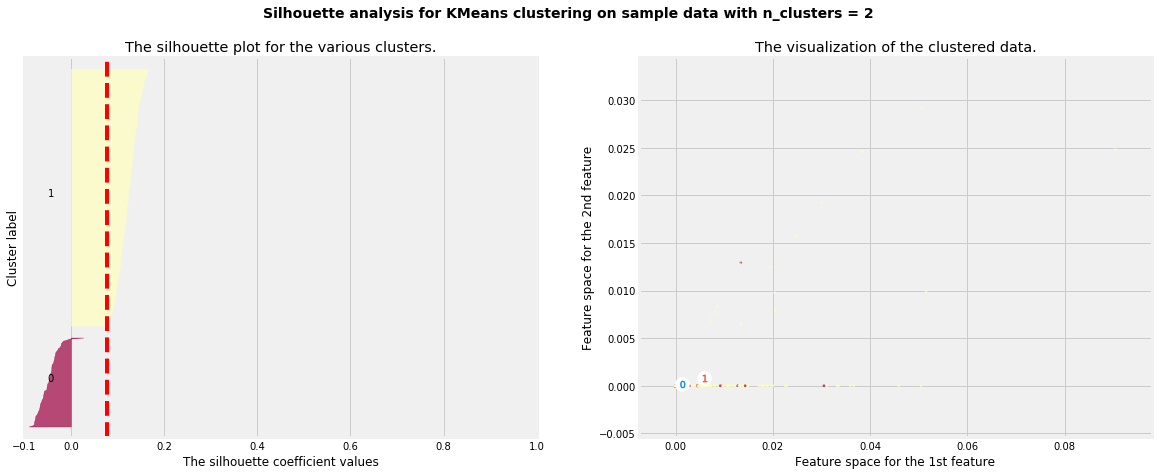

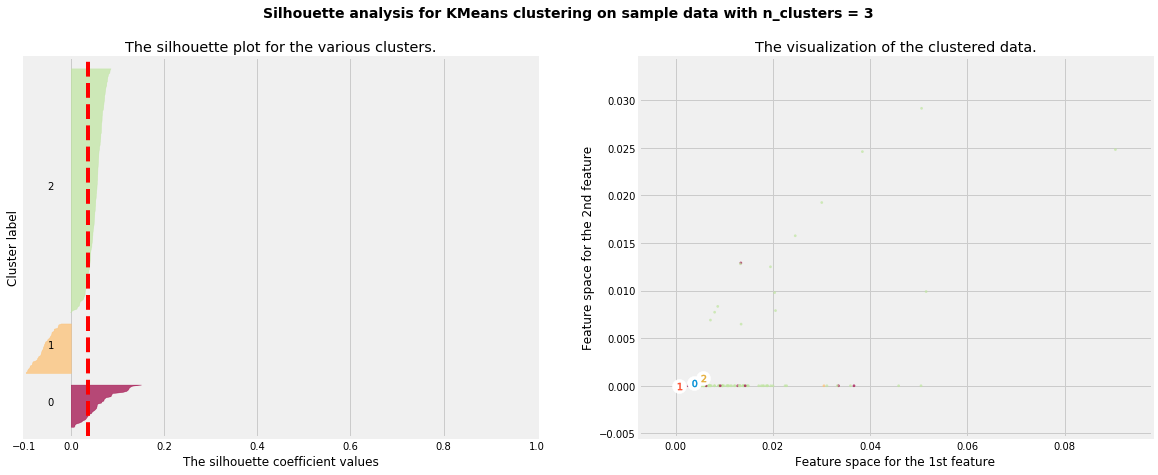

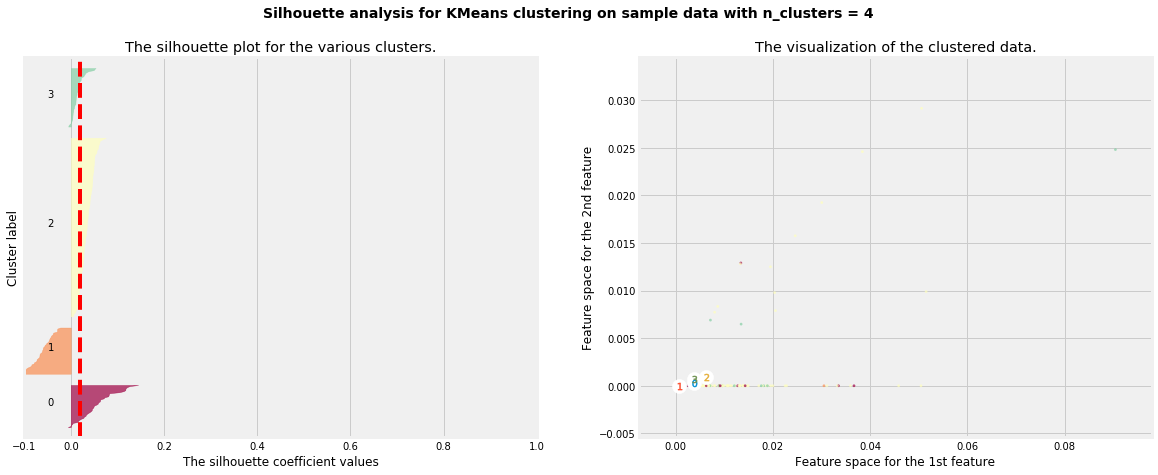

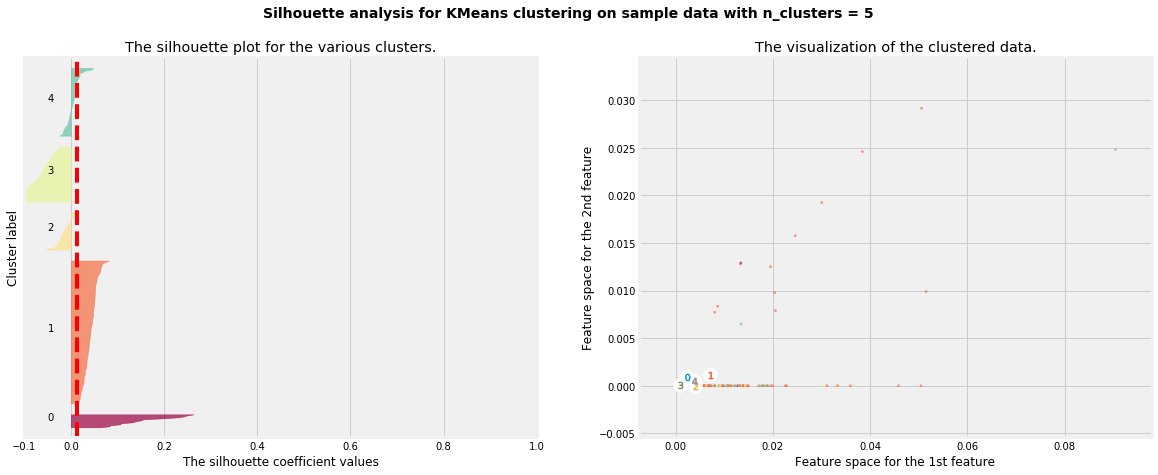

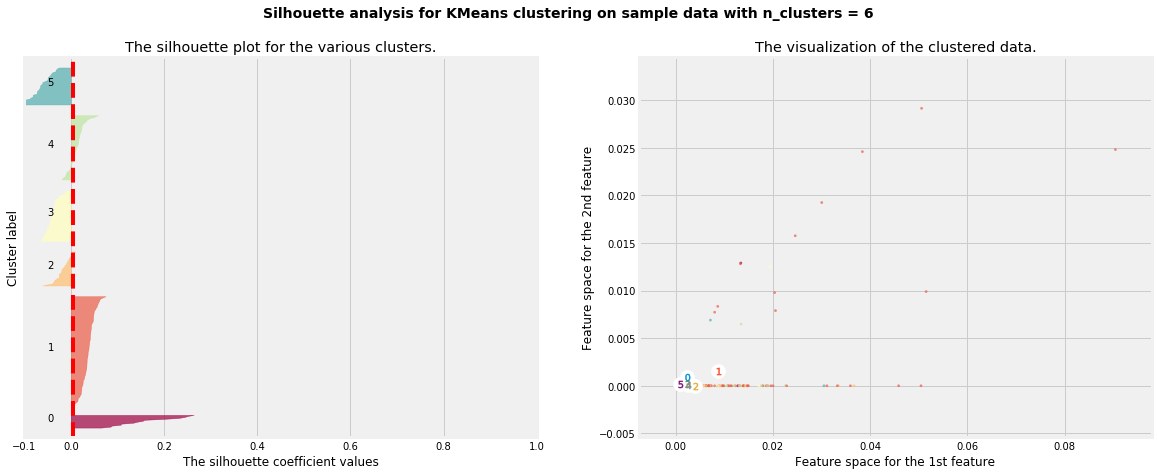

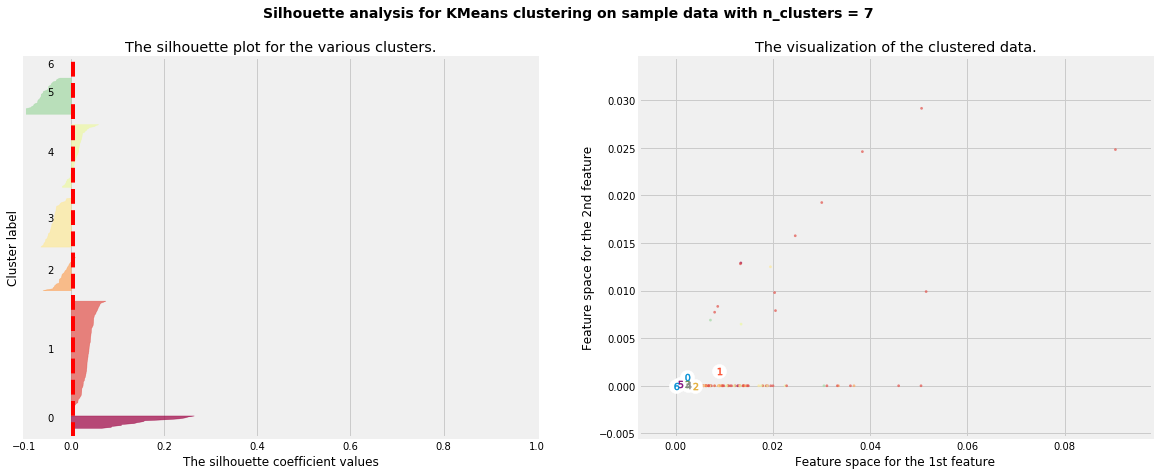

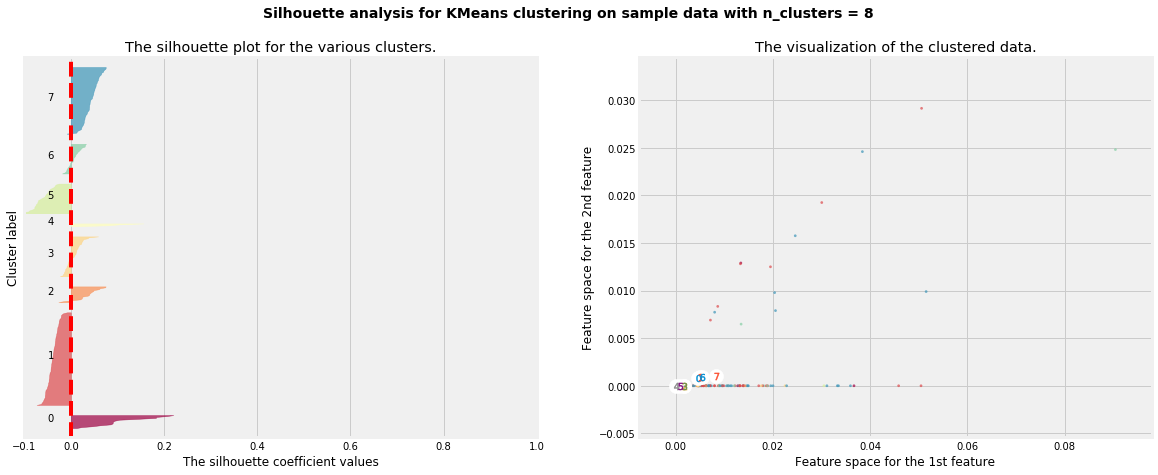

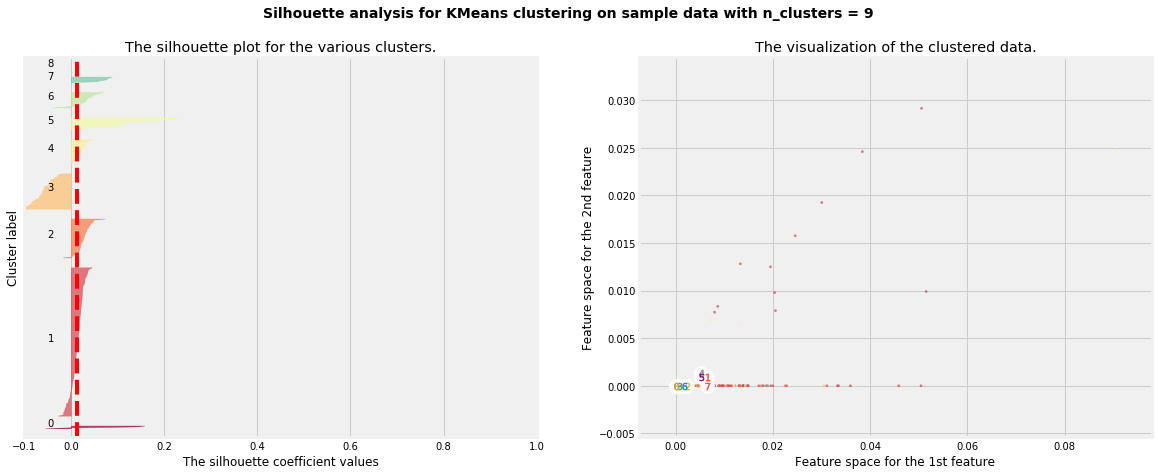

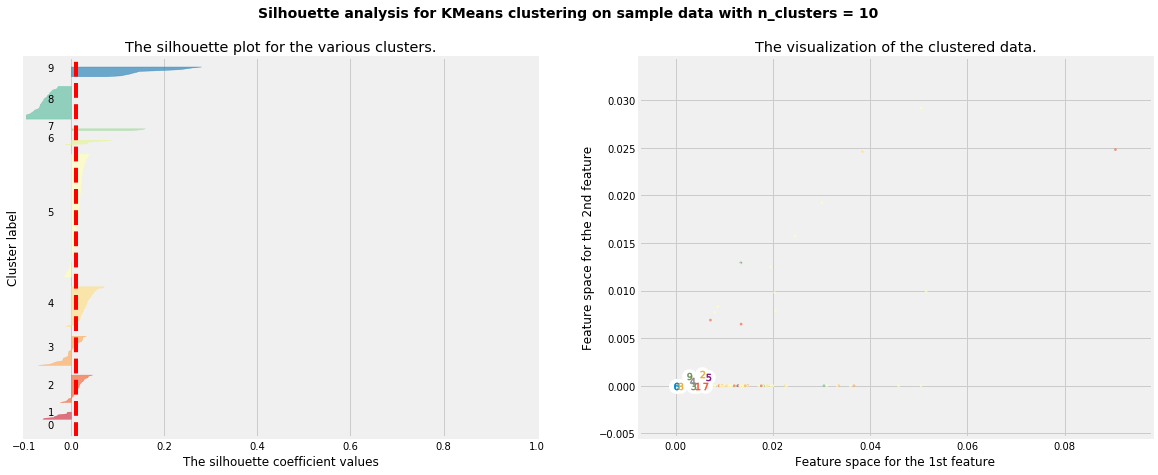

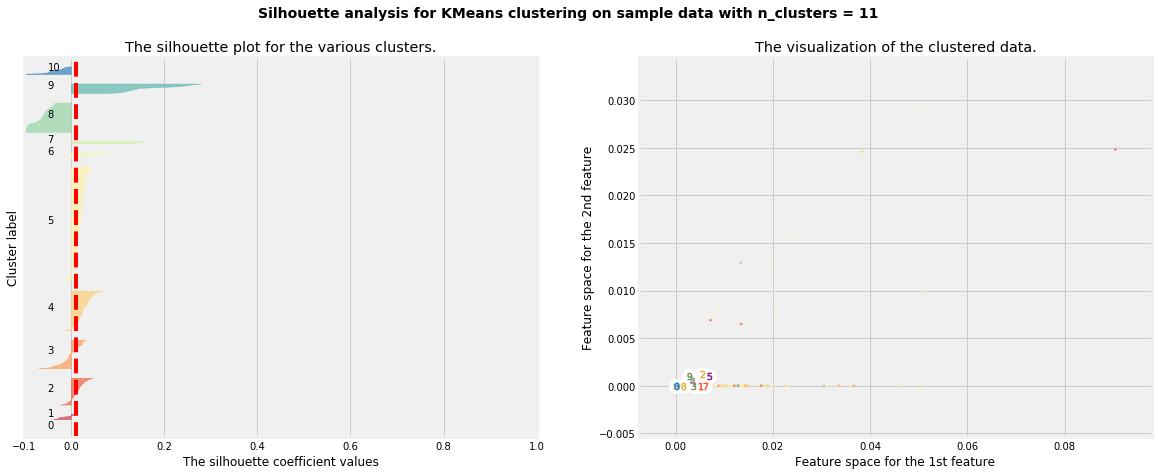

In [79]:
knife_graph(corpus_vector, range(2,12))
plt.show()

In [129]:
n_components = 6
nmf = NMF(n_components=n_components, init='nndsvd', alpha=0.0, max_iter=300, random_state=10)
W = nmf.fit_transform(corpus_vector)

In [130]:
print_top_words(nmf, n_components, tf.get_feature_names())

Topic 0:
na, dont, gon na, gon, what, not, thats, youre, out, up, wan na, wan, cause, go, one, know, woman, shit, people, think, time, right, guy, okay, theyre, want, ta, kid, now, make
Topic 1:
nigga, shit, aint, motherfucker, know, man, yall, black, white, up, dont, fuck, what, bitch, out, people, thats, na, right, as, here, gon, gon na, nigger, see, cause, white people, now, mama, black people
Topic 2:
not, people, dont, what, one, know, think, thing, thats, going, up, out, well, now, time, very, youre, joke, ive, year, good, woman, see, want, really, more, make, theyre, bit, way
Topic 3:
fucking, fuck, shit, go, right, what, fuckin, thats, dont, up, man, youre, out, ha, dick, know, na, ha ha, kid, gon na, gon, gun, cunt, now, people, what fuck, ha ha ha, shes, going, went
Topic 4:
know, guy, what, right, dont, thats, uh, yeah, not, youre, think, okay, mean, really, one, want, he, dont know, here, thing, know what, um, up, cause, good, out, theyre, go, look, love
Topic 5:
go, right,

In [137]:
df['nmf_primary'], df['nmf_secondary'] = get_n_latent_topics(W, n_components-1)
df['kmn_cluster'] = kmeans_labels

In [166]:
df[(df.kmn_cluster==1) & (df.nmf_primary==3)]

,special,full,lem_tokens,nmf_primary,nmf_secondary,kmn_cluster
4,jimmy-o-yang-good-deal-transcript,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes...",3,4,1
9,jerry-seinfeld-23-hours-to-kill-transcript,"Jerry Seinfelds new hourlong comedy special, J...","[kill, now, available, netflix, first, scene, ...",3,2,1
25,pete-davidson-alive-from-new-york-transcript,"So, Louis C.K. tried to get me fired from SNL ...","[uh, finale, snl, i-i, shocked, happy, didnt, ...",3,5,1
52,david-cross-oh-come-on-transcript,This is the full transcript of David Cross lat...,"[joy, colonic, therapy, special, theme, cross,...",3,5,1
58,jo-koy-live-from-seattle-transcript,Yo\nFinally here\nYou know Im finally here\nFi...,"[here, hear, people, talking, tour, trying, wo...",3,1,1
61,wanda-sykes-not-normal-transcript,Ladies and gentlemen... Wanda Sykes! Yes. Yes....,"[start, saying, voted, trump, came, see, fucke...",3,5,1
62,doug-stanhope-babies-and-abortion,From Dead Beat Hero (2004) Immigration. Theres...,"[think, youre, gon, na, focus, keeping, people...",3,1,1
66,demetri-martin-live-at-the-time-transcript,"Air date: August 14, 2015\nRecorded at The Lin...","[rock, music, play, crowd, thank, thank, much,...",3,5,1
68,chelsea-peretti-one-of-the-greats-transcript,"Air date: November 14, 2014 [Peretti opens the...","[tomfoolery, lowering, voice, dramatic, christ...",3,5,1
73,nate-bargatze-the-tennessee-kid-transcript,"Please welcome my daddy, Nate Bargatze. Were d...","[guy, coming, out, appreciate, uh, very, excit...",3,5,1


In [87]:
kmeans = KMeans(n_clusters=9, random_state=10)
kmeans_labels = kmeans.fit_predict(corpus_vector)

In [167]:
df[kmeans_labels==2]

,special,full,lem_tokens,nmf_primary,nmf_secondary,kmn_cluster
0,billy-connolly-high-horse-tour-live-transcript,"Ladies and gentlemen, would you please welcome...","[not, well, man, well, word, later, nice, here...",4,2,2
11,sincerely-louis-ck-transcript,Great comedy is finally back. Louis C.K. is no...,"[not, afraid, liberal, medium, bashing, twitte...",1,5,2
13,jim-norton-monster-rain-transcript,"Thank you! Aw, thank you very much. Thank you,...","[much, coming, here, tonight, thank, risking, ...",0,4,2
14,daniel-sloss-x-transcript,A man offered us a billion dollars. Bolt the ...,"[try, punch, wall, miss, clipped, there, one, ...",1,3,2
18,chris-d-elia-man-on-fire-transcript,[] Fire \n Fire [audience cheering] Man on ...,"[continues, yes, right, yeah, right, relax, fu...",2,4,2
30,dan-soder-son-of-a-gary-transcript,"Announcer: Ladies and gentlemen, Dan Soder! (c...","[wha, right, right, continues, thank, right, t...",2,3,2
47,george-carlin-dumb-americans-transcript,From Life Is Worth Losing\nRecorded on Novembe...,"[york, city, new, york, called, american, drea...",2,1,2
48,bill-burr-paper-tiger-transcript,"Recorded Live at the Royal Albert Hall, London...","[bill, burr, right, thank, thank, very, much, ...",2,3,2
54,whitney-cummings-can-i-touch-it-transcript,Ladies and gentlemen... Whitney Cummings! This...,"[dc, thank, thank, much, lot, happened, made, ...",1,4,2
55,ralphie-may-filthy-animal-tour-transcript,Ralphie May hosts his legendary Filthy Animals...,"[special, ralphie, take, fun, filled, barnyard...",1,4,2


In [107]:
print_top_words(kmeans, 9, tf.get_feature_names())

Topic 0:
ah ah ah, ah ah, ah ah ah ah, know, black, ah, wedding, what, nigga, not, dont, people, shit, white, thats, up, gon, royal, out, queen, man, delete, one, dave, aint, okay, na, cause, didnt, youre
Topic 1:
know, what, dont, go, not, thats, up, out, right, youre, na, one, guy, people, gon, gon na, think, yeah, now, here, thing, time, want, he, cause, look, okay, theyre, shit, see
Topic 2:
fucking, know, dont, what, not, thats, go, fuck, up, out, people, youre, one, right, shit, now, na, thing, think, guy, gon na, gon, going, time, here, want, theyre, cause, little, see
Topic 3:
know, not, dont, what, one, up, out, go, people, thats, here, now, time, right, year, see, guy, he, think, going, youre, come, look, well, want, little, thing, president, good, black
Topic 4:
what, not, know, dont, go, up, one, right, thats, out, thing, people, think, going, youre, fucking, ive, now, yeah, well, went, very, co, bit, time, come, man, joke, look, here
Topic 5:
nigga, know, shit, dont, what,

In [144]:
from src.item_reccomender import ItemRecommender

In [145]:
recommender = ItemRecommender()

In [203]:
recommender.fit(corpus_vector, list(df.special))

In [204]:
recommender.get_recommendations('Rory Scovel Tries Stand Up For The First Time A Netflix Special')

['Bill Burr Im Sorry Feel Way',
 'Nate Bargatze Time Magic',
 'Bill Burr People',
 'Amy Schumer Mostly Sex Stuff',
 'Tom Segura Mostly Stories']

In [201]:
list(df.special).index('Rory Scovel Tries Stand Up For The First Time A Netflix Special')

223

In [168]:
df[df.special.isin(['marc-maron-end-times-fun-transcript',
 'bill-burr-im-sorry-feel-way-2014-full-transcript',
 'bill-burr-walk-way-2017-full-transcript',
 'daniel-tosh-people-pleaser-2016-full-transcript',
 'bill-burr-people-2012-full-transcript'])]

,special,full,lem_tokens,nmf_primary,nmf_secondary,kmn_cluster
23,marc-maron-end-times-fun-transcript,[audience chattering indistinctly] [man] Ladie...,"[thank, thanks, coming, out, nice, see, quiete...",1,5,1
240,daniel-tosh-people-pleaser-2016-full-transcript,Comedy Central Stand-up Special performed at T...,"[july, pepper, butthole, surfer, die, hot, pur...",2,3,1
287,bill-burr-im-sorry-feel-way-2014-full-transcript,"[cheers and applause] All right, thank you! Th...","[going, thank, pleasure, here, greater, atlant...",3,2,1
288,bill-burr-people-2012-full-transcript,[Crowd chatter] Ladies and gentlemen: Bill Bur...,"[ya, hows, going, right, cheer, right, right, ...",2,4,1
292,bill-burr-walk-way-2017-full-transcript,"Netflix special filmed on October 21, 2016 at ...","[thank, thank, very, much, hows, going, thank,...",2,3,2


In [206]:
df[(kmeans_labels==1) & (df.nmf_primary==3)]

,special,full,lem_tokens,nmf_primary,nmf_secondary,kmn_cluster
4,Jimmy O Yang Good Deal,"ANNOUNCER: Ladies and gentlemen, welcome to th...","[came, party, hows, everybody, doing, yes, yes...",3,4,1
9,Jerry Seinfeld Hours To Kill,"Jerry Seinfelds new hourlong comedy special, J...","[kill, now, available, netflix, first, scene, ...",3,2,1
25,Pete Davidson Alive From New York,"So, Louis C.K. tried to get me fired from SNL ...","[uh, finale, snl, i-i, shocked, happy, didnt, ...",3,5,1
52,David Cross Oh Come On,This is the full transcript of David Cross lat...,"[joy, colonic, therapy, special, theme, cross,...",3,5,1
58,Jo Koy Live From Seattle,Yo\nFinally here\nYou know Im finally here\nFi...,"[here, hear, people, talking, tour, trying, wo...",3,1,1
61,Wanda Sykes Not Normal,Ladies and gentlemen... Wanda Sykes! Yes. Yes....,"[start, saying, voted, trump, came, see, fucke...",3,5,1
62,Doug Stanhope Babies And Abortion,From Dead Beat Hero (2004) Immigration. Theres...,"[think, youre, gon, na, focus, keeping, people...",3,1,1
66,Demetri Martin Live At The Time,"Air date: August 14, 2015\nRecorded at The Lin...","[rock, music, play, crowd, thank, thank, much,...",3,5,1
68,Chelsea Peretti One Of The Greats,"Air date: November 14, 2014 [Peretti opens the...","[tomfoolery, lowering, voice, dramatic, christ...",3,5,1
73,Nate Bargatze The Tennessee Kid,"Please welcome my daddy, Nate Bargatze. Were d...","[guy, coming, out, appreciate, uh, very, excit...",3,5,1


0      Billy Connolly High Horse Tour Live
1                    Hannah Gadsby Douglas
2          Patton Oswalt I Love Everything
3                  Russell Peters Deported
4                   Jimmy O Yang Good Deal
                      ...                 
316              Jim Jefferies Gun Control
317                   Reggie Watts Spatial
318    George Carlin Complaints Grievances
319     George Carlin Life Is Worth Losing
320           George Carlin Its Bad For Ya
Name: special, Length: 321, dtype: object

In [205]:
df.loc[223]

special          Rory Scovel Tries Stand Up For The First Time ...
full             [speakers: pop ballad playing] [crossing bell ...
lem_tokens       [gon, na, fuck, gon, na, killed, guy, dont, kn...
nmf_primary                                                      3
nmf_secondary                                                    5
kmn_cluster                                                      1
Name: 223, dtype: object